<a href="https://colab.research.google.com/github/PolinaKokhaniukova/github-slideshow/blob/master/9_6_Retention.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Импорт библиотек и вспомогательные функции

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## 1. Введение и импорт данных

In [2]:

from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [3]:
import pandas as pd
df = pd.read_csv('drive/My Drive/A_group.csv')

In [4]:
data = pd.read_csv('drive/My Drive/A_group.csv')

In [5]:
A_group = pd.read_csv('drive/My Drive/A_group.csv')

Добавим столбец с расчетом дохода от каждого чека у группы А, отобразим полученную форму

In [6]:
A_group['Revenue'] = df['Quantity']*df['UnitPrice']
A_group['timestamp'] = pd.to_datetime(A_group['InvoiceDate'])
A_group['client_id'] = A_group['CustomerID']

In [8]:
A_group.head()

,Unnamed: 0,InvoiceNo,StockCode,Quantity,InvoiceDate,UnitPrice,CustomerID,Revenue,timestamp,client_id
0,142009,548541,21231,4,2011-03-31 17:59:00,1.25,14957.0,5.00,2011-03-31 17:59:00,14957.0
1,142010,548541,22970,6,2011-03-31 17:59:00,2.55,14957.0,15.30,2011-03-31 17:59:00,14957.0
2,142011,548541,21164,1,2011-03-31 17:59:00,2.95,14957.0,2.95,2011-03-31 17:59:00,14957.0
3,142012,548541,82578,1,2011-03-31 17:59:00,0.55,14957.0,0.55,2011-03-31 17:59:00,14957.0
4,142013,548541,82580,1,2011-03-31 17:59:00,0.55,14957.0,0.55,2011-03-31 17:59:00,14957.0


In [18]:
A_group.tail()

,Unnamed: 0,InvoiceNo,StockCode,Quantity,InvoiceDate,UnitPrice,CustomerID,Revenue,timestamp,client_id,delta
116781,541904,581587,22613,12,2011-12-09 12:50:00,0.85,12680.0,10.20,2011-12-09 12:50:00,12680.0,252
116782,541905,581587,22899,6,2011-12-09 12:50:00,2.10,12680.0,12.60,2011-12-09 12:50:00,12680.0,252
116783,541906,581587,23254,4,2011-12-09 12:50:00,4.15,12680.0,16.60,2011-12-09 12:50:00,12680.0,252
116784,541907,581587,23255,4,2011-12-09 12:50:00,4.15,12680.0,16.60,2011-12-09 12:50:00,12680.0,252
116785,541908,581587,22138,3,2011-12-09 12:50:00,4.95,12680.0,14.85,2011-12-09 12:50:00,12680.0,252


In [ ]:
A_group['CustomerID'].value_counts()

14096.0    5128
14456.0     977
16764.0     718
16360.0     671
16729.0     668
           ... 
17331.0       1
17448.0       1
16144.0       1
13256.0       1
13307.0       1
Name: CustomerID, Length: 2187, dtype: int64

In [7]:
df = pd.read_csv('drive/My Drive/B_group.csv')

In [8]:
B_group = pd.read_csv('drive/My Drive/B_group.csv')

In [24]:
B_group['Revenue'] = df['Quantity']*df['UnitPrice']
B_group['timestamp'] = pd.to_datetime(B_group['InvoiceDate'])
B_group['client_id'] = B_group['CustomerID']

In [ ]:
B_group.head()

,Unnamed: 0,InvoiceNo,StockCode,Quantity,InvoiceDate,UnitPrice,CustomerID,Revenue,timestamp,client_id
0,0,536365,85123A,6,2010-12-01 08:26:00,2.55,17850.0,15.30,2010-12-01 08:26:00,17850.0
1,1,536365,71053,6,2010-12-01 08:26:00,3.39,17850.0,20.34,2010-12-01 08:26:00,17850.0
2,2,536365,84406B,8,2010-12-01 08:26:00,2.75,17850.0,22.00,2010-12-01 08:26:00,17850.0
3,3,536365,84029G,6,2010-12-01 08:26:00,3.39,17850.0,20.34,2010-12-01 08:26:00,17850.0
4,4,536365,84029E,6,2010-12-01 08:26:00,3.39,17850.0,20.34,2010-12-01 08:26:00,17850.0


In [14]:
B_group.tail()

,Unnamed: 0,InvoiceNo,StockCode,Quantity,InvoiceDate,UnitPrice,CustomerID,Revenue,timestamp,client_id
425118,541868,581584,85038,48,2011-12-09 12:25:00,1.85,13777.0,88.8,2011-12-09 12:25:00,13777.0
425119,541890,581586,22061,8,2011-12-09 12:49:00,2.95,13113.0,23.6,2011-12-09 12:49:00,13113.0
425120,541891,581586,23275,24,2011-12-09 12:49:00,1.25,13113.0,30.0,2011-12-09 12:49:00,13113.0
425121,541892,581586,21217,24,2011-12-09 12:49:00,8.95,13113.0,214.8,2011-12-09 12:49:00,13113.0
425122,541893,581586,20685,10,2011-12-09 12:49:00,7.08,13113.0,70.8,2011-12-09 12:49:00,13113.0


In [ ]:
B_group['CustomerID'].value_counts()

17841.0    7983
14911.0    5903
12748.0    4642
14606.0    2782
15311.0    2491
           ... 
16765.0       1
16579.0       1
18233.0       1
12503.0       1
15590.0       1
Name: CustomerID, Length: 2185, dtype: int64

In [12]:
Total = B_group['Revenue'].sum()
print ('Revenue',Total)

Revenue 8000797.210999998


In [ ]:
Total = A_group['Revenue'].sum()
print ('Revenue',Total)

Revenue 2016867.4199999997


По суммарному доходу видно, то группа В значительно более успешная.

Построим гистограму для определения длины временного промежутка двух баз наблюдения. 

In [9]:
def visualize_all_data(df):
    data = df.copy()
    min_date = A_group['timestamp'].min()
    max_date = A_group['timestamp'].max()

    data['delta'] = (A_group['timestamp'] - min_date).apply(lambda x: np.floor(x.days/7))


    g_data = data.groupby('CustomerID').first().reset_index()
    g_data['delta'] = (g_data['timestamp'] - min_date).apply(lambda x: np.floor(x.days/7))

    sns.set(style='white', context='notebook', rc={'figure.figsize':(8,5)})
    bin_num=int(np.floor((max_date-min_date).days/7))
    
    sns.distplot(data['delta'], kde=False,bins=bin_num, norm_hist=True, label='')
    sns.distplot(g_data['delta'], kde=False,bins=bin_num, norm_hist=True, label='')
    plt.xlabel('Недели с начала наблюдения')

    plt.legend(labels=["Все посещения в эту неделю","Пользователи, пришедшие в эту неделю"])
    plt.show()
    print('начало наблюдения: '+ str(min_date))

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


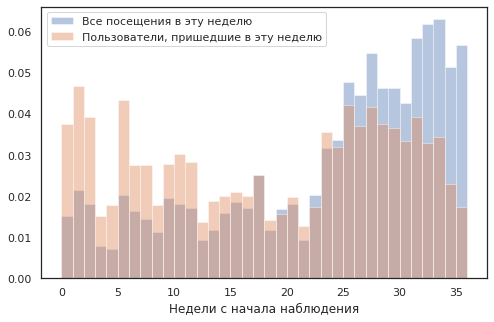

начало наблюдения: 2011-03-31 17:59:00


In [ ]:
visualize_all_data(A_group)

In [10]:
def visualize_all_data(df):
    data = df.copy()
    min_date = B_group['timestamp'].min()
    max_date = B_group['timestamp'].max()

    data['delta'] = (B_group['timestamp'] - min_date).apply(lambda x: np.floor(x.days/7))


    g_data = data.groupby('CustomerID').first().reset_index()
    g_data['delta'] = (g_data['timestamp'] - min_date).apply(lambda x: np.floor(x.days/7))

    sns.set(style='white', context='notebook', rc={'figure.figsize':(8,5)})
    bin_num=int(np.floor((max_date-min_date).days/7))
    
    sns.distplot(data['delta'], kde=False,bins=bin_num, norm_hist=True, label='')
    sns.distplot(g_data['delta'], kde=False,bins=bin_num, norm_hist=True, label='')
    plt.xlabel('Недели с начала наблюдения')

    plt.legend(labels=["Все посещения в эту неделю","Пользователи, пришедшие в эту неделю"])
    plt.show()
    print('начало наблюдения: '+ str(min_date))

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


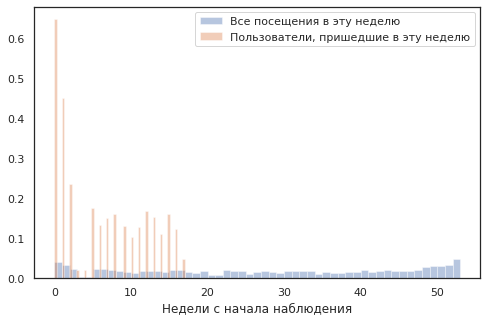

начало наблюдения: 2010-12-01 08:26:00


In [ ]:
visualize_all_data(B_group)

Мы видим, что данные в группе А собраны за 35 недель, а в группе В за 50 недель. Начало наблюдения за группой В было в декабре 2010 года, а группы А в марет 2011. Значит данные несопоставимы, нужно провести их обработку для дальнейшего анализа.



Для измерения retention и  его изменений во времени используем когортный анализ. 

Пользователи присоединившиеся за первые неделю с начала наблюдения - это одна когорта

пользователи присоединившиеся тоже за недельный интервал, но спустя 90 дней - это будет другая когорта

Поведение пользователей можно пронаблюдать продолжительное время и сделать вывод о том, каким retention обладает каждая их когорт. На основе этого можно например сделать анализ - изменился ли у нас retention за 90 дней или нет

В данном случае наш анализ можно резюмировать:

Когорты вылеоим по признаку  - `acquisution time`  
Сравниваем когорты между собой по показателю  - `retention`

## 2. Выделение когорт по времени присоединения

In [11]:
#размер когорты (в этом примере этот параметр будет также использоваться как величина периода для наблюдений за когортой)
cohort_size = 14
#интервал времени между когортами для сравнения
interval_between_cohorts = 90

dataframe = A_group

#найдем для пользоваателей их даты присоединения:
g_data = A_group.groupby('CustomerID')['timestamp'].first().reset_index()
#колонка delta - день присоединения с начала наблюдения:

g_data['delta'] = (g_data['timestamp'] - A_group['timestamp'].min()).apply(lambda x: x.days)


#получим айдишники  пользователей присоединившихся в первую неделю и во вторую:
cohort_1_users = g_data[g_data['delta']<=cohort_size]['CustomerID'].unique()
cohort_2_users = g_data.loc[(g_data['delta']>interval_between_cohorts) &
                            (g_data['delta']<=interval_between_cohorts+cohort_size)]['CustomerID'].unique()

#полные логи событий для каждой из когорт:
data_c1 = A_group[A_group['CustomerID'].isin(cohort_1_users)].copy()
data_c2 = A_group[A_group['CustomerID'].isin(cohort_2_users)].copy()

Визуализируем теперь аналогично время регистрации новых событий/ новых пользователей для выделенных когорт:

In [18]:
def visualize_users(df):
    data = df.copy()
    min_date = data['timestamp'].min()

    g_data = data.groupby('CustomerID').first().reset_index()
    g_data['delta'] = (g_data['timestamp'] - min_date).apply(lambda x: x.days/7)

    sns.set(style='white', context='notebook', rc={'figure.figsize':(8,5)})

    sns.distplot(g_data['delta'], kde=False,bins=2, norm_hist=False, label='')
    plt.xlabel('Недели с начала наблюдения когортой')

    plt.legend(labels=["Пользователи, пришедшие в эту неделю"])
    plt.xlim([0,75])
    plt.show()
    print('начало наблюдения за когортой: '+ str(min_date))

def visualize_purchases(df):
    data = df.copy()
    min_date = data['timestamp'].min()
    max_date = data['timestamp'].max()

    data['delta'] = (data['timestamp'] - min_date).apply(lambda x: np.floor(x.days/7))


    sns.set(style='white', context='notebook', rc={'figure.figsize':(8,5)})
    bin_num=int(np.floor((max_date-min_date).days/7))
    
    sns.distplot(data['delta'], kde=False,bins=bin_num, norm_hist=False, label='')
    plt.xlabel('Недели с начала наблюдения за когортой')

    plt.legend(labels=["Все посещения в эту неделю"])
    plt.xlim([0,75])
    plt.show()
    print('начало наблюдения за когортой: '+ str(min_date))



Можем сравнить поведение когорт между собой.  

Например, можем построить, как убывала доля активных пользователей в каждой из когорт интервал к интервалу с момента начала наблюденя за когортой:

In [19]:
data_c1['delta'] = (data_c1['timestamp'] - data_c1['timestamp'].min())\
                    .apply(lambda x: np.floor(x.days / cohort_size))


data_c2['delta'] = (data_c2['timestamp'] - data_c2['timestamp'].min())\
                    .apply(lambda x: np.floor(x.days / cohort_size))


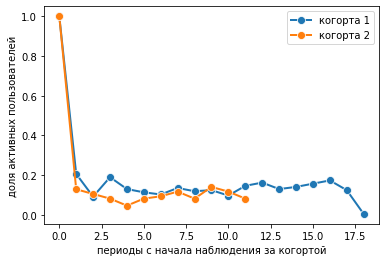

In [20]:
retention_c1 =  data_c1.groupby('delta')['CustomerID'].apply(lambda x: len(set(x)))
retention_c2 =  data_c2.groupby('delta')['CustomerID'].apply(lambda x: len(set(x)))


sns.lineplot(x = retention_c1.index, y = retention_c1.values/max(retention_c1.values),
             lw = 2, marker="o", markersize = 8)

sns.lineplot(x = retention_c2.index, y = retention_c2.values/max(retention_c2.values),
             lw = 2, marker="o", markersize = 8)

plt.xlabel('периоды с начала наблюдения за когортой')
plt.ylabel('доля активных пользователей')

plt.legend(labels=["когорта 1","когорта 2"])
plt.show()


Мы видим, что когорта первых двух недель 1го месяца (напомним - cohort_size был 14 дней, а две когорты брались с 90 дневной разницей) обладает более высоким retention, чем когоорта пользователей первых двух недель 4-го месяца. Но можно судить о возникновении некторого плато ближе к концу наблюдения.




```
# Выбран кодовый формат
```

Можно например сравнить эти группы по другим признакам - например, по сумме по чеку.

In [21]:
purch_c1 =  data_c1.groupby('delta').apply(lambda x: len(x['Revenue'])/x['CustomerID'].nunique())
purch_c2 =  data_c2.groupby('delta').apply(lambda x: len(x['Revenue'])/x['CustomerID'].nunique())

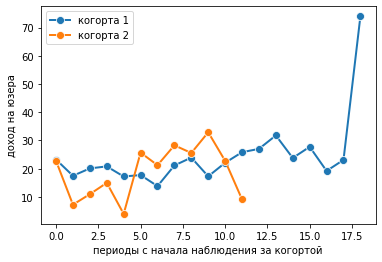

In [22]:
sns.lineplot(x = purch_c1.index, y = purch_c1.values,
             lw = 2, marker="o", markersize = 8)

sns.lineplot(x = purch_c2.index, y = purch_c2.values,
             lw = 2, marker="o", markersize = 8)

plt.xlabel('периоды с начала наблюдения за когортой')
plt.ylabel('доход на юзера')

plt.legend(labels=["когорта 1","когорта 2"])
plt.show()

Видно, что когорта 1 - вела себя активнее в первые недели работы с сервисом, но потом активность фактически сравнялась со второй когортой.


Проведем аналогичный анализ для группы В

In [25]:
#размер когорты (в этом примере этот параметр будет также использоваться как величина периода для наблюдений за когортой)
cohort_size = 14
#интервал времени между когортами для сравнения
interval_between_cohorts = 90

dataframe = B_group

#найдем для пользоваателей их даты присоединения:
g_data_B = B_group.groupby('CustomerID')['timestamp'].first().reset_index()
#колонка delta - день присоединения с начала наблюдения:

g_data_B['delta'] = (g_data_B['timestamp'] - B_group['timestamp'].min()).apply(lambda x: x.days)


#получим айдишники  пользователей присоединившихся в первую неделю и во вторую:
cohort_1_users = g_data_B[g_data_B['delta']<=cohort_size]['CustomerID'].unique()
cohort_2_users = g_data_B.loc[(g_data_B['delta']>interval_between_cohorts) &
                            (g_data_B['delta']<=interval_between_cohorts+cohort_size)]['CustomerID'].unique()

#полные логи событий для каждой из когорт:
data_c1 = B_group[B_group['CustomerID'].isin(cohort_1_users)].copy()
data_c2 = B_group[B_group['CustomerID'].isin(cohort_2_users)].copy()

In [26]:
data_c1['delta'] = (data_c1['timestamp'] - data_c1['timestamp'].min())\
                    .apply(lambda x: np.floor(x.days / cohort_size))


data_c2['delta'] = (data_c2['timestamp'] - data_c2['timestamp'].min())\
                    .apply(lambda x: np.floor(x.days / cohort_size))

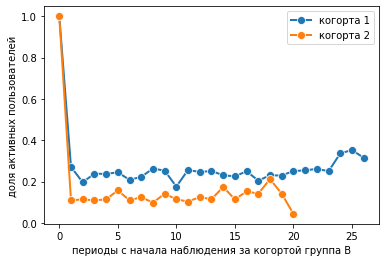

In [27]:
retention_c1 =  data_c1.groupby('delta')['CustomerID'].apply(lambda x: len(set(x)))
retention_c2 =  data_c2.groupby('delta')['CustomerID'].apply(lambda x: len(set(x)))


sns.lineplot(x = retention_c1.index, y = retention_c1.values/max(retention_c1.values),
             lw = 2, marker="o", markersize = 8)

sns.lineplot(x = retention_c2.index, y = retention_c2.values/max(retention_c2.values),
             lw = 2, marker="o", markersize = 8)

plt.xlabel('периоды с начала наблюдения за когортой группа В')
plt.ylabel('доля активных пользователей')

plt.legend(labels=["когорта 1","когорта 2"])
plt.show()


In [33]:
purch_c1 =  data_c1.groupby('delta').apply(lambda x: len(x['Revenue'])/x['CustomerID'].nunique())
purch_c2 =  data_c2.groupby('delta').apply(lambda x: len(x['Revenue'])/x['CustomerID'].nunique())

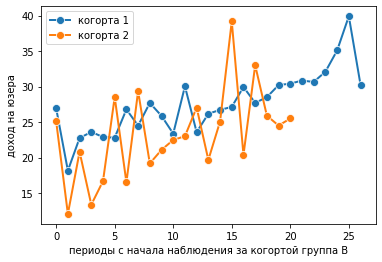

In [ ]:
sns.lineplot(x = purch_c1.index, y = purch_c1.values,
             lw = 2, marker="o", markersize = 8)

sns.lineplot(x = purch_c2.index, y = purch_c2.values,
             lw = 2, marker="o", markersize = 8)

plt.xlabel('периоды с начала наблюдения за когортой группа В')
plt.ylabel('доход на юзера')

plt.legend(labels=["когорта 1","когорта 2"])
plt.show()

Сравнивая графики активности пользователей и дохода на юзера по группам А и В можно сказать, что в группе В доля активных пользователей была выше (в группе А ниже 0,2, в группе В в среднем выше 0,2) и их средний доход был выше (в группе А ниже 30, в группе В в среднем выше).

## 3.  Когортная матрица retention для многих групп:



Выше мы сравнивали между собой поведение двух групп. Теперь используем способ визуализации retention через когортную матрицу, который позволяет наглядно оценить как меняется retention (доля активных пользователей) для различных когорт разбитых по времени присоединения.

Для этого различные когорты пользоваателей выделяются в строки, а столбцы означают номер недели с момента начала наблюдения за когортой. Таким образом поолучается диагональная матрица, так  как период наблюдения за более раннеей когортой пользователей будет дольше, чем за когортой недавно присоединившихся пользователей.



In [28]:
#найдем для пользоваателей их даты присоединения:
g_dataA = A_group.groupby('CustomerID')['timestamp'].first().to_frame()
g_dataB = B_group.groupby('CustomerID')['timestamp'].first().to_frame()



In [29]:
#колонка delta - день присоединения с начала наблюдения:
g_dataA['delta'] = (g_dataA['timestamp'] - A_group['timestamp'].min()).apply(lambda x: x.days)
g_dataB['delta'] = (g_dataB['timestamp'] - B_group['timestamp'].min()).apply(lambda x: x.days)

In [30]:
A_group['acquisition_day'] = A_group['CustomerID'].map(g_dataA['delta'].to_dict())
B_group['acquisition_day'] = B_group['CustomerID'].map(g_dataB['delta'].to_dict())

In [31]:
#за интервал возьмем 1 месяц:
rete_period = 30 #выбираем период в 30 дней - примерно месяц
A_group['delta'] = (A_group['timestamp']-A_group['timestamp'].min()).apply(lambda x: x.days)
A_group['acquisition_period'] = A_group['acquisition_day'].apply(lambda  x: np.floor(x / rete_period))
A_group['activity_month'] = A_group['delta'].apply(lambda  x: np.floor(x / rete_period))
A_group['lifetime_period'] =  A_group['activity_month'] - A_group['acquisition_period']

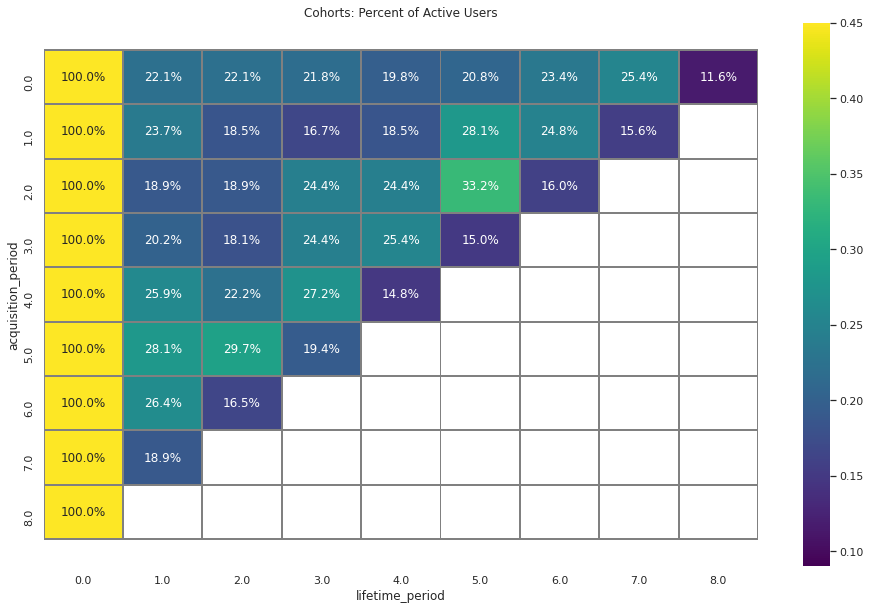

In [32]:
cohorts = A_group.groupby(['acquisition_period','lifetime_period']).agg({'CustomerID':'nunique'}).reset_index()

inital_users_count = cohorts[cohorts['lifetime_period'] == 0][['acquisition_period','CustomerID']]
inital_users_count = inital_users_count.rename(columns={'CustomerID':'cohort_users'})


cohorts = cohorts.merge(inital_users_count,on='acquisition_period')
cohorts['metric'] = cohorts['CustomerID']/cohorts['cohort_users']

cohort_metric_pivot = cohorts.pivot_table(index='acquisition_period',
                                      columns='lifetime_period'
                                      ,values='metric',
                                      aggfunc='sum')

sns.set(style='white', context='notebook', rc={'figure.figsize':(16,10)})

plt.title('Cohorts: Percent of Active Users')
sns.heatmap(cohort_metric_pivot, annot=True, fmt='.1%', linewidths=1, linecolor='gray', cmap='viridis',
            vmin=0.09, vmax=0.45,)

b, t = plt.ylim() 
b += 0.5 
t -= 0.5 
plt.ylim(b, t)

plt.show();

Аналогичо для группы В

In [33]:
#за интервал возьмем 1 месяц:
rete_period = 30 #выбираем период в 30 дней - примерно месяц
B_group['delta'] = (B_group['timestamp']-B_group['timestamp'].min()).apply(lambda x: x.days)
B_group['acquisition_period'] = B_group['acquisition_day'].apply(lambda  x: np.floor(x / rete_period))
B_group['activity_month'] = B_group['delta'].apply(lambda  x: np.floor(x / rete_period))
B_group['lifetime_period'] =  B_group['activity_month'] - B_group['acquisition_period']

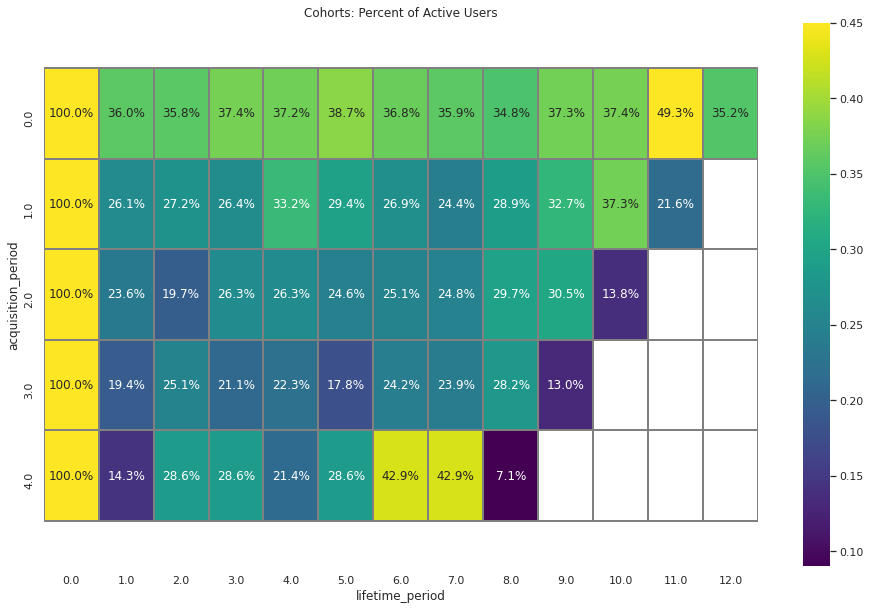

In [34]:
cohorts = B_group.groupby(['acquisition_period','lifetime_period']).agg({'CustomerID':'nunique'}).reset_index()

inital_users_count = cohorts[cohorts['lifetime_period'] == 0][['acquisition_period','CustomerID']]
inital_users_count = inital_users_count.rename(columns={'CustomerID':'cohort_users'})


cohorts = cohorts.merge(inital_users_count,on='acquisition_period')
cohorts['metric'] = cohorts['CustomerID']/cohorts['cohort_users']

cohort_metric_pivot = cohorts.pivot_table(index='acquisition_period',
                                      columns='lifetime_period'
                                      ,values='metric',
                                      aggfunc='sum')

sns.set(style='white', context='notebook', rc={'figure.figsize':(16,10)})

plt.title('Cohorts: Percent of Active Users')
sns.heatmap(cohort_metric_pivot, annot=True, fmt='.1%', linewidths=1, linecolor='gray', cmap='viridis',
            vmin=0.09, vmax=0.45,)

b, t = plt.ylim() 
b += 0.5 
t -= 0.5 
plt.ylim(b, t)

plt.show();



Анализируя когортные матрицы retention для групп А и В можно сказать:
1. Ретеншн в руппе В значительно выше, "нулевая" когорта фактически не теряла пользователей со 2-го месяца использования, ретеншн на уровне 35%.
2. Заметное снижение активнсти в группе А  на 8м месяце исследования использования продукта. В группе В на 12м. Но в группе В  показатель ретеншн попрежнему остается выше.



## 4. Кривые выживания  и подведение итогов по тесту.

Построим кривую по динамике активных пользователей в группе А и В за весь приод. Количество дней разделю на 30, будет статистика условно по месяцам.

In [34]:
A_group['delta_SC'] = (A_group['timestamp']-A_group['timestamp'].min()).apply(lambda x: np.floor(x.days / 30))


B_group['delta_SC'] = (B_group['timestamp']-B_group['timestamp'].min()).apply(lambda x: np.floor(x.days / 30))

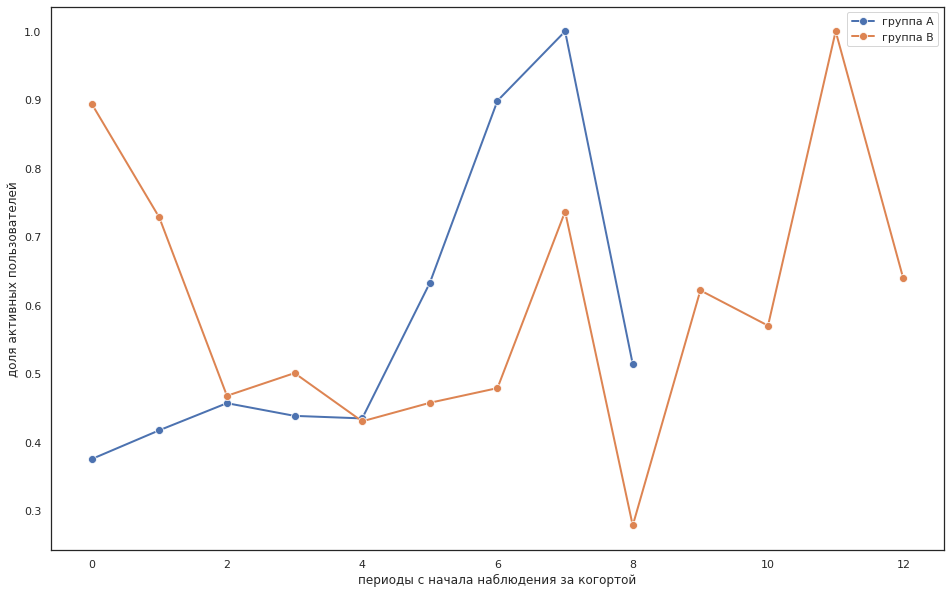

In [35]:
retention_A =  A_group.groupby('delta_SC')['CustomerID'].apply(lambda x: len(set(x)))
retention_B =  B_group.groupby('delta_SC')['CustomerID'].apply(lambda x: len(set(x)))


sns.lineplot(x = retention_A.index, y = retention_A.values/max(retention_A.values),
             lw = 2, marker="o", markersize = 8)

sns.lineplot(x = retention_B.index, y = retention_B.values/max(retention_B.values),
             lw = 2, marker="o", markersize = 8)

plt.xlabel('периоды с начала наблюдения')
plt.ylabel('доля активных пользователей')

plt.legend(labels=["группа А","группа В"])
plt.show()


Кривые получились не очень информативными, но можно проследить одинаковые траектории активности у клиентов обеих групп. В целом группа А более ровная по активности.

Построим кривые выживаемости, сгрупировав данные по периоду активности (lifetimeperiod)

In [45]:
retention_A_gr =  A_group.groupby('lifetime_period')['CustomerID'].apply(lambda x: len(set(x)))
retention_B_gr =  B_group.groupby('lifetime_period')['CustomerID'].apply(lambda x: len(set(x)))

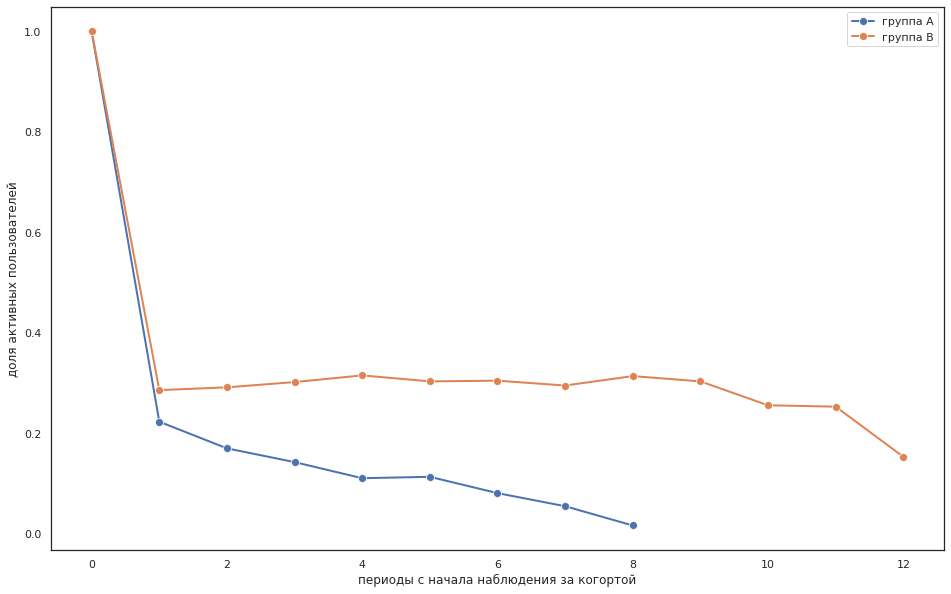

In [37]:
sns.lineplot(x = retention_A_gr.index, y = retention_A_gr.values/max(retention_A_gr.values),
             lw = 2, marker="o", markersize = 8)

sns.lineplot(x = retention_B_gr.index, y = retention_B_gr.values/max(retention_B_gr.values),
             lw = 2, marker="o", markersize = 8)

plt.xlabel('периоды с начала наблюдения')
plt.ylabel('доля активных пользователей')

plt.legend(labels=["группа А","группа В"])
plt.show()

На графике видно, что выживаемость в группе В значительно лучше, чем в группе А. После первого месяца ретеншн участников группы В сразу был выше. Снижение в группе А можно наблюдать уже со втогого месяца. В группе А было некоторое плато со 2го по 9 месяц, но потом активность тоже идет на спад.

В целом можно говорть о том, что группа В более активна и ретеншн в ней выше. 

In [ ]:
Построим диаграму распределения вероятностей по lifetime period в группах А и В.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


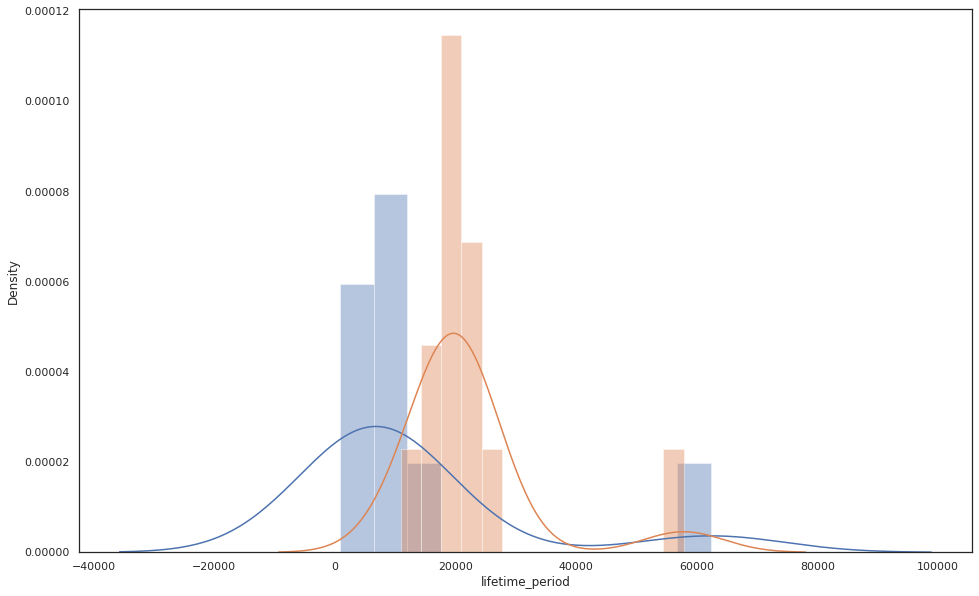

In [49]:
import seaborn as sns
sns.distplot(A_group['lifetime_period'].value_counts())
sns.distplot(B_group['lifetime_period'].value_counts())


Проведем тест на нормальность распределния

In [58]:
from scipy import stats
stats.normaltest(A_group['lifetime_period'].value_counts())

/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  "anyway, n=%i" % int(n))


NormaltestResult(statistic=23.065988764465498, pvalue=9.801311230251821e-06)

In [64]:
from scipy import stats
stats.normaltest(B_group['lifetime_period'].value_counts())

/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=13
  "anyway, n=%i" % int(n))


NormaltestResult(statistic=28.547726659033103, pvalue=6.323243708072251e-07)

В группах А и В lifetime_period имеет ненормальное распределние, т.к. pvalue больше 0,5.

Ниже проведен тест Шапиро-Уилка, который тоже отвергает нормальность распределнеия. 

In [59]:
import scipy
stat, p = scipy.stats.shapiro(A_group['lifetime_period'].value_counts()) # тест Шапиро-Уилк
print('Statistics=%.3f, p-value=%.3f' % (stat, p))
alpha = 0.05
if p > alpha:
    print('Принять гипотезу о нормальности')
else:
    print('Отклонить гипотезу о нормальности')

Statistics=0.579, p-value=0.000
Отклонить гипотезу о нормальности


In [60]:
from scipy.stats import ttest_ind

In [61]:
sum1 = A_group['lifetime_period'].value_counts()
sum2 = B_group['lifetime_period'].value_counts()
scipy.stats.ttest_ind(sum2, sum1)

Ttest_indResult(statistic=1.4559659408492502, pvalue=0.160921388944812)

In [62]:
stat, p = ttest_ind(sum1, sum2)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Same distributions (fail to reject H0)')
else:
	print('Different distributions (reject H0)')

Statistics=-1.456, p=0.161
Same distributions (fail to reject H0)


Проведенный Т-тест предлагает отклонить нулевую гипотезу. Значит можно говорить о статистической значимости проведенного теста, и что изменения продукта принесли положительно значимые результаты. Тест можно завершать. 